### Download and install tesseract: https://github.com/tesseract-ocr/tesseract

### Download clip from https://www.youtube.com/watch?v=FaLaPEnjeqY

Other resources:

https://github.com/prabhakar267/ocr-convert-image-to-text

https://stackoverflow.com/questions/42316979/select-object-by-color-in-an-image?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

./3CharacterClassifiers.pdf

https://github.com/tesseract-ocr/tesseract/wiki/Data-Files

http://nbviewer.jupyter.org/github/krohak/CADL/blob/master/session-3/session-3.ipynb

https://github.com/krohak/CADL/blob/master/session-3/libs/vae.py

https://video.stackexchange.com/questions/4563/how-can-i-crop-a-video-with-ffmpeg?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa


## First method: Edge Detection

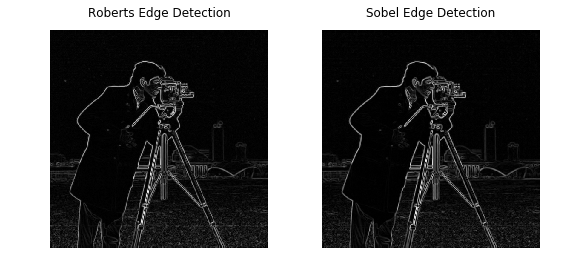

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt


image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [14]:
import numpy as np
import os
import json
from matplotlib import (pyplot as plt, patches as patches)
from PIL import Image # pip install pillow
from skimage.filters import threshold_local # pip install scikit-image
import scipy
from skimage import util 
from skimage.measure import block_reduce

In [7]:
image_file = 'experiment0/5.png'
print(image_file)
img = Image.open(image_file).convert('LA')

experiment0/5.png


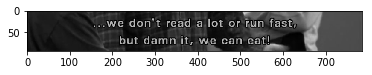

In [8]:
plt.imshow(img)
plt.show()

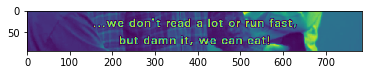

In [9]:
img = np.array(img)
img = img[:,:,0]

#img = img > 150
#img = block_reduce(img, (3,3) , cval=0)

plt.imshow(img)
plt.show()
scipy.misc.imsave('experiment0/save.jpg', img)

In [277]:
# img = util.invert(img)
# img.shape
# img = img[:,:,2]
# plt.imshow(img)
# plt.show()

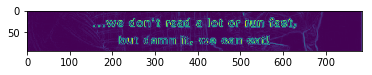

In [10]:
# edge_roberts = util.invert(roberts(img))
edge_roberts = roberts(img)
plt.imshow(edge_roberts)
plt.show()

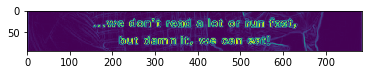

In [11]:
edge_sobel = sobel(img)
plt.imshow(edge_sobel)
plt.show()

In [12]:
#edge_sobel = block_reduce(edge_sobel, (2,2) , cval=0)
edge_sobel = edge_sobel > 0.29

In [13]:
scipy.misc.imsave('experiment0/edge-red.jpg', edge_sobel)

In [16]:
os.system('tesseract experiment0/edge-red.jpg experiment0/edge-red')

0

## Second Method: Binarize [High Pass filer]

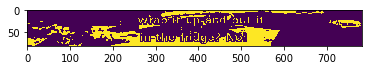

In [17]:
image_file = 'experiment1/test2.png'

img = Image.open(image_file).convert('LA')


img = np.array(img)

img = img[:,:,0]

img = img > 170

#img = img < 200

scipy.misc.imsave('experiment1/test2.jpg', img)
plt.imshow(img)
plt.show()

In [18]:
os.system('tesseract experiment1/test2.jpg experiment1/test2')

0

## Third Method: Bandpass Filter (Works best)

In [19]:
import cv2

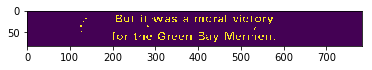

In [20]:
image = cv2.imread("experiment2/test1.png")

lower = np.array([140, 140, 140])
upper = np.array([199, 199, 199])
shapeMask = cv2.inRange(image, lower, upper)

plt.imshow(shapeMask)
plt.show()


#shapeMask = shapeMask > 130

scipy.misc.imsave('experiment2/test1.jpg', shapeMask)
#cv2.imshow("obj shapeMask", shapeMask)

In [21]:
os.system('tesseract experiment2/test1.jpg experiment2/test1')

0

## Automate snapshot + cropping using FFMPEG:

Download and save https://www.youtube.com/watch?v=FaLaPEnjeqY in .

In [23]:
if not os.path.exists('friends'):
    os.mkdir('friends')
    os.system('ffmpeg -i Thanksgiving\ clips\ from\ FRIENDS.mp4 -filter:v "crop=in_w:2*in_h/10:0:7*in_h/10" -r 0.5 friends/friends-%08d.jpg')

files = [os.path.join('friends', f) for f in os.listdir('friends')]

In [24]:
files = np.sort(files)
files[:10]

array(['friends/friends-00000001.jpg', 'friends/friends-00000002.jpg',
       'friends/friends-00000003.jpg', 'friends/friends-00000004.jpg',
       'friends/friends-00000005.jpg', 'friends/friends-00000006.jpg',
       'friends/friends-00000007.jpg', 'friends/friends-00000008.jpg',
       'friends/friends-00000009.jpg', 'friends/friends-00000010.jpg'],
      dtype='<U28')

In [25]:
output=[]
#os.mkdir('friends/output')

for file in files:
    
    image = cv2.imread(file)

    lower = np.array([140, 140, 140])
    upper = np.array([199, 199, 199])
    shapeMask = cv2.inRange(image, lower, upper)

    #plt.imshow(shapeMask)
    #plt.show()

    scipy.misc.imsave(str(file) + '.jpg', shapeMask)
    
    os.system('tesseract ' +str(file) +'.jpg ' + str(file))
    
    #output.append(os.system('cat '+ str(file)+'.txt'))

In [26]:
output = [os.path.join('friends', f) for f in os.listdir('friends') if '.txt' in f]

In [27]:
output=np.sort(output)

In [28]:
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [29]:
outputs=[]
for f in output:
    with open(f, "r", encoding='utf-8') as f:
        lines=f.readlines()
        fileout=[]
        for line in lines:
            cleanedLine = cleanSentences(line)
            if cleanedLine:
                fileout.append(cleanedLine)
        outputs.append(fileout)

In [30]:
for i, x in enumerate(outputs):
    print(i,x)

0 [' ', '     ']
1 [' ', '     ']
2 []
3 []
4 []
5 []
6 ['n as the best', ' ', 'inner ever', '  ']
7 ['monica that was the best', 'thanksgiving dinner ever', ' ']
8 ['it wasvso good', 'i think you killed us', ' ']
9 [' ']
10 ['m a', 'i couldnt possibly eat another ', ' ']
11 ['i need something sweet']
12 []
13 ['dos anyone wfm to watch tv']
14 []
15 ['2', 'ur monica your remote doesnt work']
16 []
17 ['r', 'you ham to lift it and point']
18 []
19 ['oh forget it']
20 []
21 ['lets play that game where evggyone', 'says one thing theyre thankf eafor', ' ']
22 ['lets play that game where everyone', ' ', 'says one thing theyre thankfu f', ' ', ' ']
23 ['i know monica 5 worst thanksglvmg']
24 ['li', 'lets not tellltiifstory m a']
25 [' d', 'w qszjfv 7 1', '5 lets not tell thisdry', 'oc']
26 ['4', 'mnig 5', 'w7 l1t sl thfeone where joey got', 'turkey stuck on his head']
27 ['2', 'n', 'w 4 jiebsjhe one where joey got', '1 g monic s turkey stuck on his head']
28 []
29 ['a ', 'joey gog a turkey s

## Alternative Method: Use extract_text (worse result)

In [31]:
# output=[]
# #os.mkdir('friends/output')

# for file in files:
    
#     os.system('python2 extract_text ' +str(file) +  ' '+ str(file)+'.jpg')
    
#     #output.append(os.system('cat '+ str(file)+'.txt'))